## 컴퓨터 네트워크

**내 파이썬 프로그램과 저 반대편의 네트워크 서버 간 어떻게 통신할 수 있을까?** 
파이썬은 내장 TCP 소켓 지원이 있다.

TCP/IP 포트는 포트에 따라 다른 어플리케이션과 상관관계를 맺는다.
80은 웹 포트이고, 포트 443은 HTTPS 포트이다.

즉, 웹 서버에 접속하고자 할 때 **호스트 이름/넘버 ->포트 연결-> 호스트에 웹 서버가 있다면 웹 서버와 통신**한다.

In [ ]:
# 웹 사이트와 연결(전화걸기)
import socket
mysock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
mysock.connect(('data.pr4e.org', 80)) # 호스트 / 포트(대부분 인터넷 사이트는 포트 80을 사용한다)

## HTTP(하이퍼텍스트 전송 프로토콜)
http://(프로토콜) www.dr-chuck.com(호스트) /page1.htm(문서)

### 서버에서 데이터 얻기
1. 유저가 새로운 페이지로 가기 위한 a tag 'href=value'를 클릭
2. 브라우저가 웹서버와 연결을 시도하고 "GET" request 발신(해당 URL 페이지의 내용을 GET하기 위해) : REQUEST
   - GET http://www.fb.com HTTP/1.0
3. 서버가 브라우저로 HTML 문서를 반환하고, parse하여 유저에게 보여준다. : RESPONSE

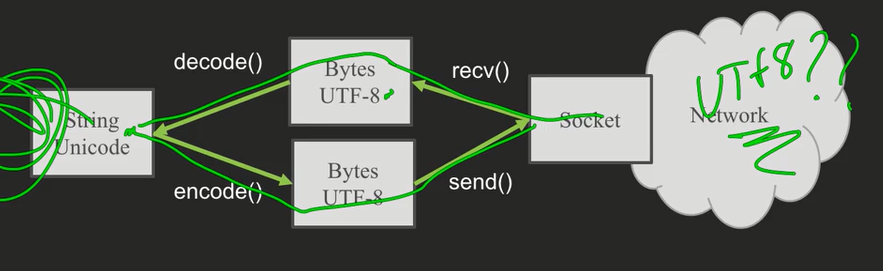

In [1]:
# HTTP Request in Python
import socket
mysock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
mysock.connect(('data.pr4e.org', 80))
cmd = 'GET http://data.pr4e.org/romeo.txt HTTP/1.0\n\n'.encode() # Make a request(HTTP 프로토콜. encode()는 유니코드를 byte로 변환한다.
mysock.send(cmd) # Send a request

# Receive data in socket
while True:
    data = mysock.recv(512) # up to 512 characters a time. type(data) = bytes!!!
    if (len(data) < 1):
        break
    print(data.decode()) # decode attribute의 기본 인자는 utf-8 or ascii. decode from bytes to unicode which runs inside.
mysock.close() # close socket

HTTP/1.1 200 OK
Date: Fri, 13 Jul 2018 12:59:04 GMT
Server: Apache/2.4.18 (Ubuntu)
Last-Modified: Sat, 13 May 2017 11:22:22 GMT
ETag: "a7-54f6609245537"
Accept-Ranges: bytes
Content-Length: 167
Cache-Control: max-age=0, no-cache, no-store, must-revalidate
Pragma: no-cache
Expires: Wed, 11 Jan 1984 05:00:00 GMT
Connection: close
Content-Type: text/plain


But soft what light through yonder window breaks
It is the east and Juliet is the sun
Arise fair sun and kill the envious moon
Who is already sick and pale with grief



## ASCII
각 문자는 8비트(1바이트)의 메모리에 저장된 0~256 사이의 숫자로 표현되었다.
`ord()` 함수는 간단한 ASCII 문자의 숫자값을 반환한다.

그러나 아스키 코드는 라틴 글자, 아라비아 숫자만 표현할 수 있는 치명적인 단점이 있었고, 결국 일본 컴퓨터와 미국 컴퓨터가 통신하지 못하는 것과 같은 문제가 발생했다. 그래서 이를 해결하기 위해 나온 것이 바로, **Unicode**이다. 유니코드는 문자열의 집합인데, 유니코드의 인코딩 방식 중 가장 유명한 것이 바로 **UTF-8**이다.

## UTF-8
UTF-16, UTF-32가 있지만, 가장 좋은 것은 UTF-8(1~4 가변 바이트)이다. UTF-8의 장점은 다음과 같다.
- ASCII와 호환
- ASCII와 UTF-8 사이에 자동으로 감지가 가능
- 다른 시스템 사이에 데이터 교환을 할 때, 가장 적합

파이썬 2에서는 byte문자열과 일반 문자열이 같았고, 일반 문자열과 유니코드 문자열이 다르게 취급되었다(different type)

파이썬 3에서는 byte문자열과 일반 문자열이 다르고, 일반 문자열과 유니코드 문자열이 같게 취급된다.

In [2]:
print(ord('H'))

72


위에서 소켓을 만들고 그를 통해 웹 서버와 통신했는데, 그럴 필요가 없다. **URLLIB**라는 라이브러리가 있기 때문!!

In [3]:
import urllib.request, urllib.parse, urllib.error

fhand = urllib.request.urlopen('http://data.pr4e.org/romeo.txt')
for line in fhand:
    print(line.decode().strip())

But soft what light through yonder window breaks
It is the east and Juliet is the sun
Arise fair sun and kill the envious moon
Who is already sick and pale with grief


In [4]:
fhand = urllib.request.urlopen('http://data.pr4e.org/romeo.txt')

counts = dict()
for line in fhand:
    words = line.decode().split()
    for word in words:
        counts[word] = counts.get(word, 0) + 1
print(counts)

{'But': 1, 'soft': 1, 'what': 1, 'light': 1, 'through': 1, 'yonder': 1, 'window': 1, 'breaks': 1, 'It': 1, 'is': 3, 'the': 3, 'east': 1, 'and': 3, 'Juliet': 1, 'sun': 2, 'Arise': 1, 'fair': 1, 'kill': 1, 'envious': 1, 'moon': 1, 'Who': 1, 'already': 1, 'sick': 1, 'pale': 1, 'with': 1, 'grief': 1}


## Web Scraping
파이썬이 브라우저 흉내를 내서 웹페이지를 받아, 정보를 추출하는 것.

HTML에서 파싱하기는 사실 어렵다. 왜냐하면 표준 규약도 지키지 않고, 문법도 틀린 웹 페이지가 너무 많기 때문이다. 하지만 이런 문제를 해결해주는 라이브러리가 등장했으니, 바로 "BeautifulSoup"이다.

## BeautifulSoup
Requests는 정말 좋은 라이브러리이지만, html을 ‘의미있는’, 즉 Python이 이해하는 객체 구조로 만들어주지는 못한다. req.text는 python의 문자열(str)객체를 반환할 뿐이기 때문에 정보를 추출하기가 어렵다.

따라서 BeautifulSoup을 이용하게 된다. 이 BeautifulSoup은 html 코드를 Python이 이해하는 객체 구조로 변환하는 Parsing을 맡고 있고, 이 라이브러리를 이용해 우리는 제대로 된 ‘의미있는’ 정보를 추출해 낼 수 있다.

In [5]:
from bs4 import BeautifulSoup
import ssl

# SSL 인증서 에러 무시
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

url = input('Enter - ')
html = urllib.request.urlopen(url, context=ctx).read() # 전체를 하나의 큰 덩어리 str로 읽어온다.
soup = BeautifulSoup(html, 'html.parser') # 파싱

# Retrieve all of the ancher tags
tags = soup('a') #list of lots of lots of tags
for tag in tags:
    print(tag.get('href', None))

Enter - http://www.wikipedia.org
//en.wikipedia.org/
//ja.wikipedia.org/
//es.wikipedia.org/
//de.wikipedia.org/
//ru.wikipedia.org/
//it.wikipedia.org/
//fr.wikipedia.org/
//zh.wikipedia.org/
//pt.wikipedia.org/
//pl.wikipedia.org/
//de.wikipedia.org/
//en.wikipedia.org/
//es.wikipedia.org/
//fr.wikipedia.org/
//it.wikipedia.org/
//nl.wikipedia.org/
//ja.wikipedia.org/
//pl.wikipedia.org/
//pt.wikipedia.org/
//ru.wikipedia.org/
//ceb.wikipedia.org/
//sv.wikipedia.org/
//vi.wikipedia.org/
//war.wikipedia.org/
//zh.wikipedia.org/
//ar.wikipedia.org/
//az.wikipedia.org/
//bg.wikipedia.org/
//zh-min-nan.wikipedia.org/
//be.wikipedia.org/
//ca.wikipedia.org/
//cs.wikipedia.org/
//da.wikipedia.org/
//et.wikipedia.org/
//el.wikipedia.org/
//eo.wikipedia.org/
//eu.wikipedia.org/
//fa.wikipedia.org/
//gl.wikipedia.org/
//ko.wikipedia.org/
//hy.wikipedia.org/
//hi.wikipedia.org/
//hr.wikipedia.org/
//id.wikipedia.org/
//he.wikipedia.org/
//ka.wikipedia.org/
//la.wikipedia.org/
//lt.wikipedia.or

BeautifulSoup에서는 여러가지 기능을 제공하는데, 여기서는 select를 이용한다. select는 CSS Selector를 이용해 조건과 일치하는 모든 객체들을 List로 반환해준다.

soup객체는 <태그>로 구성된 요소를 Python이 이해하는 상태로 바꾼 것이라 볼 수 있다. 따라서 여러가지로 조작이 가능하다.

## Login with Session: 클리앙 parser 만들기.
웹 사이트를 로그인 하는데 있어 쿠키와 세션을 빼놓고 이야기하는 것은 불가능합니다.

이번 포스팅에서는 requests모듈을 이용해 로그인이 필요한 웹 사이트를 크롤링 하는 예제를 다룹니다.

웹은 대다수가 HTTP기반으로 동작합니다. 하지만 HTTP가 구현된 방식에서 웹 서버와 클라이언트는 지속적으로 연결을 유지한 상태가 아니라 요청(request)-응답(response)의 반복일 뿐이기 때문에, 이전 요청과 새로운 요청이 같은 사용자(같은 브라우저)에서 이루어졌는지를 확인하는 방법이 필요합니다. 이 때 등장하는 것이 ‘쿠키’와 ‘세션’입니다.
쿠키는 유저가 웹 사이트를 방문할 때 사용자의 브라우저에 심겨지는 작은 파일인데, Key - Value 형식으로 로컬 브라우저에 저장됩니다. 서버는 이 쿠키의 정보를 읽어 HTTP 요청에 대해 브라우저를 식별합니다.

그러나, 쿠키는 로컬에 저장된다는 근원적인 문제로 인해 악의적 사용자가 쿠키를 변조하거나 탈취해 정상적이지 않은 쿠키로 서버에 요청을 보낼 수 있습니다. 만약 ‘로그인 하였음’이라는 식별을, 로컬 쿠키만을 신뢰해 로그인을 한 상태로 서버가 인식한다면 쿠키 변조를 통해 마치 관리자나 다른 유저처럼 행동할 수도 있는 것이죠.(굉장히 위험합니다.)

이로 인해 서버측에서 클라이언트를 식별하는 ‘세션’을 주로 이용하게 됩니다.

세션은 브라우저가 웹 서버에 요청을 한 경우 서버 내에 해당 세션 정보를 파일이나 DB에 저장하고 클라이언트의 브라우저에 session-id라는 임의의 긴 문자열을 줍니다. 이때 사용되는 쿠키는 클라이언트와 서버간 연결이 끊어진 경우 삭제되는 메모리 쿠키를 이용합니다.

## Requests의 Session

조금 더 상세하게 뜯어봅시다. 아래 스크린샷을 보시면 input필드들의 name이 `_csrf,userID,userPassword,remember-me`가 있는 것을 볼 수 있습니다. 또한, 로그인 버튼을 누르면 auth.login()라는 자바스크립트 함수가 먼저 실행되는 것을 볼 수 있습니다.
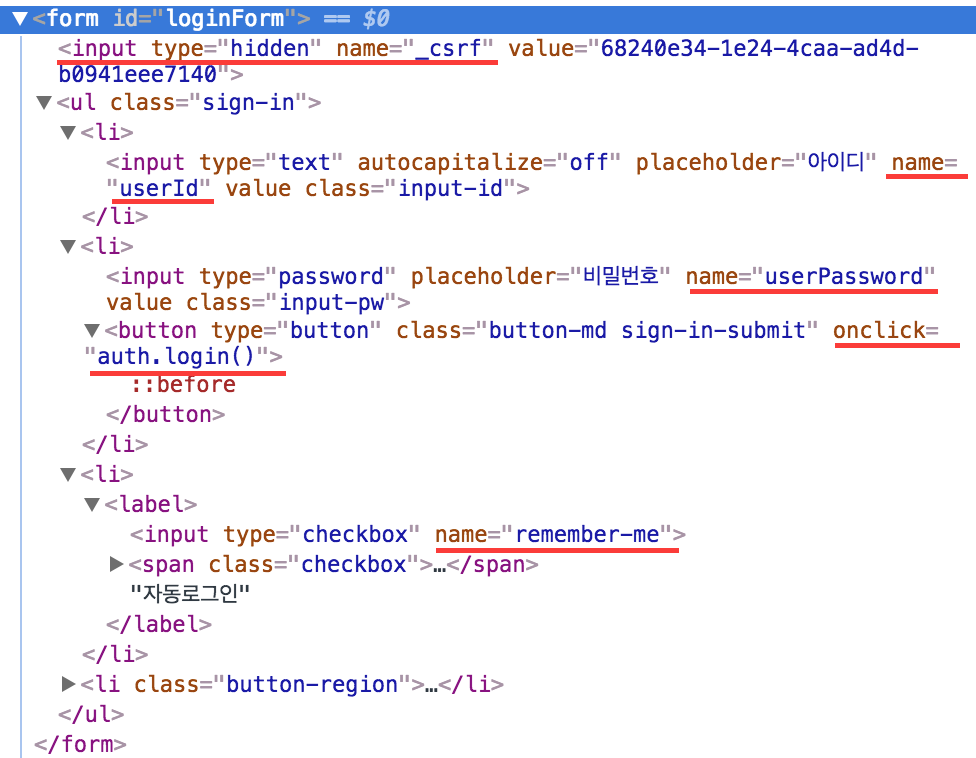
로그인을 구현하기 전, HTML form에 대해 간단하게 알아봅시다.

HTML form Field에서는 name:입력값이라는 Key:Value식으로 데이터를 전달합니다.(주로 POST방식)

클리앙 로그인 폼 필드의 경우 userID:사용자id, userPassword:사용자pw라는 세트로 입력을 받는 것을 볼 수 있습니다.

그리고 약간 특이해 보이는 `_csrf`이라는 것도 있습니다. 원래 CSRF는 사용자의 요청이 악의적이거나 제 3자에 의해 변조된(해킹된) 요청이 아닌지 확인해주는 보안 도구중 하나입니다. 세션과 연결되어 폼을 전달할때 폼의 안정성을 높여줍니다. 새로고침하시면 매번 달라지는 CSRF값을 보실 수 있습니다. 그리고 CSRF를 사용하는 경우 CSRF값이 없는 폼 전송은 위험한 요청으로 생각하고 폼을 받아들이지 않습니다.(즉, 로그인이 되지 않습니다.) 따라서 우리는 `_csrf`라는 것도 함께 전송해 줘야 합니다. 따라서 메인 화면을 먼저 가져와 `_csrf`필드를 가져오고 로그인을 해야 합니다.

In [45]:
import requests
from bs4 import BeautifulSoup

LOGIN_INFO = {
    'userId': 'pangpaul',
    'userPassword': 'sakaeNAGOYAM5'
}

# 세션 생성
with requests.Session() as s:
    # HTTP GET Request: request 대신 s 객체를 사용한다.
    first_page = s.get('https://www.clien.net/service/')
    html = first_page.text
    soup = BeautifulSoup(html, 'html.parser')
    
    # input태그 중에서 name이 _csrf인 것을 찾습니다.
    csrf = soup.find('input', {'name':'_csrf'})
    print('_csrf: ', csrf['value'])
    
    # 이제 LOGIN_INFO에 csrf값을 넣어줍시다.
    # 두 dict를 합치는 방법은 {**dict1, **dict2} 으로 dict들을 unpacking하는 것입니다.
    LOGIN_INFO = {**LOGIN_INFO, **{'_csrf': csrf['value']}}
    print('로그인 정보: ', LOGIN_INFO)
    
    # 재 로그인
    login_req = s.post('https://www.clien.net/service/login', data=LOGIN_INFO)
    print('http code: ', login_req.status_code, end='\n\n')
    if login_req.status_code != 200: raise Exception('Cannot Login! Wrong ID or password.')
    
    # 로그인된 세션 유지 상태
    # 모두의공원 이용규칙을 가져온다.
    first_one = s.get('https://www.clien.net/service/board/rule/10707404')
    soup = BeautifulSoup(first_one.text, 'html.parser')
    
    title = soup.select('#div_content > div.post_title.symph_row > h3 > span')
    contents = soup.select('#div_content > div.post_view > div.post_content > article > div')
    
    print('<{}>'.format(title[0].get_text()))
    print(contents[0].get_text())

_csrf:  4a713292-2b8e-47e8-8e6b-fd66cc39ed18
로그인 정보:  {'userId': 'pangpaul', 'userPassword': 'sakaeNAGOYAM5', '_csrf': '4a713292-2b8e-47e8-8e6b-fd66cc39ed18'}
http code:  200

<모두의공원 게시판 이용규칙>




  모두의 공원 게시판은 주제의 구분없이 게시물을 작성하고, 회원간 의견을 주고 받을 수 있는 게시판입니다.

0. [사이트 이용규칙]을 준수하는 범위 내에서 자유롭게 이용할 수 있습니다.

1. 특수목적의 게시판이 존재하는 경우 해당 게시판을 이용해주시기 바랍니다.

질문 / 추천 / 요청은 [아무거나질문] 게시판에 올려주세요.
물품을 다른 회원에게 사거나 팔고자 하는 경우 [회원중고장터] 게시판에 올려주세요
홍보 게시물은 [직접홍보] 게시판을 이용하세요.

2. 아래의 질문은 모두의 공원에 게시할 수 있습니다.

설문 등 다른 회원의 의견을 묻는 경우
개인적인 고민, 진로, 애정문제 등 개개인의 특별한 케이스의 질문의 경우
주가 되는 다른 내용에 일부분 질문이 포함되어 있는 경우
게시 목적이 답변을 원하는 경우가 아닌 경우






#### 사용된 웹 기술 확인

In [1]:
import builtwith

builtwith.parse('http://www.wordpress.com')

{'blogs': ['PHP', 'WordPress'],
 'cms': ['WordPress'],
 'ecommerce': ['WooCommerce'],
 'font-scripts': ['Google Font API'],
 'programming-languages': ['PHP'],
 'web-servers': ['Nginx']}

In [2]:
builtwith.parse('http://korra0501.blogspot.kr')

{'advertising-networks': ['Google AdSense'],
 'javascript-frameworks': ['Lightbox', 'Underscore.js'],
 'photo-galleries': ['Lightbox'],
 'programming-languages': ['Java'],
 'web-servers': ['OpenGSE']}

In [6]:
from urllib.request import urlopen
req = urlopen("http://python.org")
html = req.read()
html

b'<!doctype html>\n<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->\n<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->\n<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">\n\n    <meta name="application-name" content="Python.org">\n    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">\n    <meta name="apple-mobile-web-app-title" content="Python.org">\n    <meta name="apple-mobile-web-app-capable" content="yes">\n    <meta name="apple-mobile-web-app-status-bar-style" content="black">\n\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <meta name="Ha

## HTTP Errors
- **400대 Client Errors**
    - 클라이언트 때문에 생긴 에러
- ** 500대 Server Errors**
    - 서버가 요구를 만족하지 못한 에러

In [12]:
from urllib.request import Request
from urllib.request import HTTPError
from urllib.request import urlopen

# 최대 3번 시도, 500대 에러로 시도 실패 시, 다시 시도.
def download(url, agent="python bot", num_retries=2):
    headers = {'User-agent': agent}
    req = Request(url, headers=headers)
    try:
        html = urlopen(req).read().decode()
    except HTTPError as e:
        html = None
        print("Error: ", e.code, e.reason)
        
        if 500 <= e.code <600 and num_retries>0:
            return download(url, num_retries=num_retries-1)
    return html

download("http://www.google.com/search?q=korean")

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><link href="/images/branding/product/ico/googleg_lodp.ico" rel="shortcut icon"><title>korean - Google &#44160;&#49353;</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{float:left}}a.gb1,a.gb4{text-decoration:underline !important}a.gb1,a.gb4{color:#00c !important}.gbi .gb4{color:#dd8e27 !important}.gbf .gb4{color:#900 !important} </style><style>.star{float:left;margin-top:1px;overflow:hidden}.ybhkme{font-size:11px}.j{width:34em}body,td,div,.p,a{font-family:arial,sans-s

In [8]:
# Chrome F12키 눌러서 USER-AGENT를 자신의 것을 갖고와서, 봇이 아닌 것처럼 속여보자.
agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"
download("https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EA%B3%A0%EB%A0%A4%EB%8C%80&sm=chr_hty", agent=agent)

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="고려대 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'고려대\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'고려대\'의 네이버 통합검색 결과입니다."> <title>고려대 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_140327.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_180712.css"> <link rel="stylesheet" type="text/css" href="h

## Requests
Python에는 requests라는 유명한 http request 라이브러리가 있다.

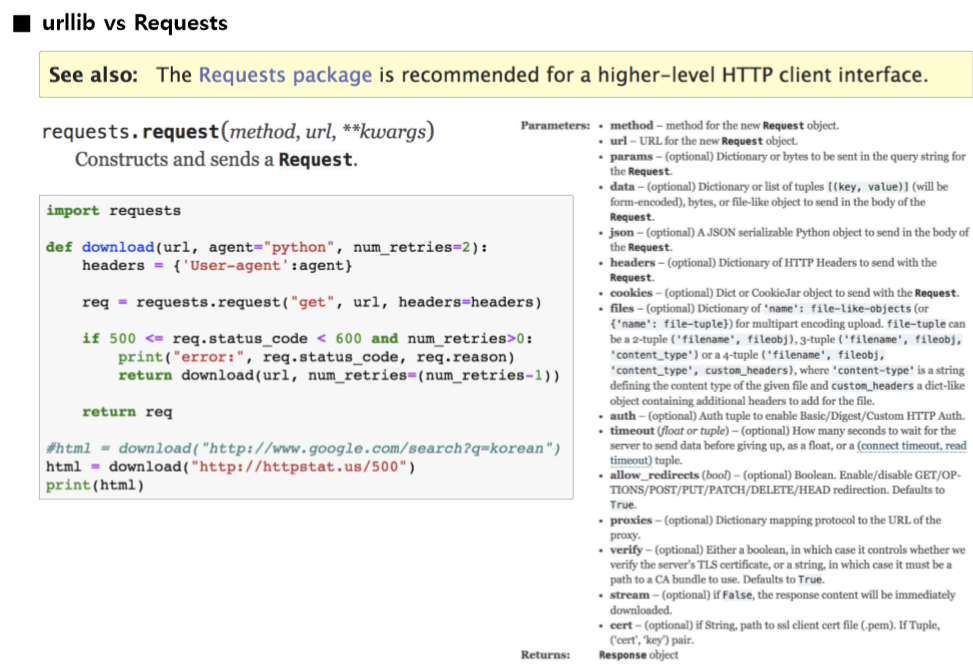

In [10]:
# URLLIB가 아닌, reqeusts를 사용!!!
import requests

def download(url, agent="python", num_retries=2):
    headers = {'User-agent': agent}
    resp = requests.request("get", url, headers=headers)
        
    if 500 <= resp.status_code <600 and num_retries>0:
        print("Error: ", resp.status_code, resp.reason)
        return download(url, num_retries=(num_retries-1))
    
    return resp

In [4]:
agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"
html = download("https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EA%B3%A0%EB%A0%A4%EB%8C%80&sm=chr_hty", agent=agent)

In [5]:
html #하나의 response 객체가 나온 것에 주의하쟈!

<Response [200]>

In [6]:
html.text

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="고려대 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'고려대\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'고려대\'의 네이버 통합검색 결과입니다."> <title>고려대 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_140327.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_180712.css"> <link rel="stylesheet" type="text/css" href="h

In [1]:
import urllib.parse as parse
import json

params = {'where':'nexearch',
         'sm':'top_hty',
         'fbm':1,
         'ie':'utf8',
         'query':parse.quote('고려대')}
json_params = json.dumps(params)

In [2]:
# URLLIB가 아닌, reqeusts를 사용!!!
import requests
from urllib.request import Request
from urllib.request import HTTPError

def download_json(url, agent="python", num_retries=2):
    headers = {'User-agent': agent}
    resp = requests.request("post", url, headers=headers, json=json_params)
        
    if 500 <= resp.status_code <600 and num_retries>0:
        print("Error: ", req.status_code, req.reason)
        return download(url, num_retries=(num_retries-1))
    
    return req

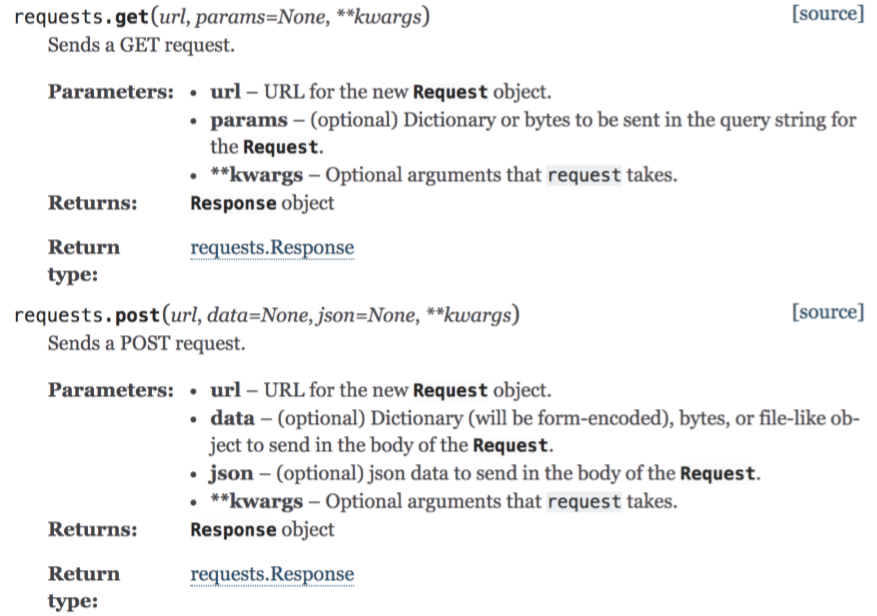

In [3]:
def download_get(url, agent="python", num_retries=2):
    headers = {'User-agent': agent}
    resp = requests.get(url, params=params, headers=headers)
        
    if 500 <= resp.status_code <600 and num_retries>0:
        print("Error: ", resp.status_code, resp.reason)
        return download(url, num_retries=(num_retries-1))
    
    return resp

In [4]:
agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"
html = download_get("https://search.naver.com/search.naver", agent=agent)

In [5]:
html.text

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="%EA%B3%A0%EB%A0%A4%EB%8C%80 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'%EA%B3%A0%EB%A0%A4%EB%8C%80\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'%EA%B3%A0%EB%A0%A4%EB%8C%80\'의 네이버 통합검색 결과입니다."> <title>%EA%B3%A0%EB%A0%A4%EB%8C%80 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_140327.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstat

In [6]:
from bs4 import BeautifulSoup

doc = BeautifulSoup(html.text, "lxml")
doc.find_all('a') # a tag의 list

[<a href="#lnb"><span>메뉴 영역으로 바로가기</span></a>,
 <a href="#content"><span>본문 영역으로 바로가기</span></a>,
 <a class="bt_atcp _btn_arw fold" href="#" onclick="return false;"><span class="blind _text">자동완성 펼치기</span><span class="ico_arrow spnew"></span></a>,
 <a href="#" onclick="return false;">@txt@</a>,
 <a class="spat ico_info" href="https://help.naver.com/support/alias/search/word/word_16.naver" onclick="__atcmpCR(event, this, 'plus.help', '','','');" target="_blank"><span class="blind">도움말 보기</span></a>,
 <a class="btn_turnon active" href="#" onclick="__atcmpCR(event, this, 'plus.use', '','','');">ON<span class="blind">선택됨</span></a>,
 <a class="btn_turnoff" href="#" onclick="__atcmpCR(event, this, 'plus.unuse', '','','');">OFF</a>,
 <a class="btn btn_login" href="https://nid.naver.com/nidlogin.login?url=https%3A%2F%2Fsearch.naver.com%2Fsearch.naver%3Fwhere%3Dnexearch%26sm%3Dtop_hty%26fbm%3D1%26ie%3Dutf8%26query%3D%2525EA%2525B3%2525A0%2525EB%2525A0%2525A4%2525EB%25258C%252580" onclick="__a

In [7]:
for row in doc.find_all('a'):
    print(type(row), row.attrs['href'])

<class 'bs4.element.Tag'> #lnb
<class 'bs4.element.Tag'> #content
<class 'bs4.element.Tag'> #
<class 'bs4.element.Tag'> #
<class 'bs4.element.Tag'> https://help.naver.com/support/alias/search/word/word_16.naver
<class 'bs4.element.Tag'> #
<class 'bs4.element.Tag'> #
<class 'bs4.element.Tag'> https://nid.naver.com/nidlogin.login?url=https%3A%2F%2Fsearch.naver.com%2Fsearch.naver%3Fwhere%3Dnexearch%26sm%3Dtop_hty%26fbm%3D1%26ie%3Dutf8%26query%3D%2525EA%2525B3%2525A0%2525EB%2525A0%2525A4%2525EB%25258C%252580
<class 'bs4.element.Tag'> https://help.naver.com/support/alias/search/word/word_16.naver
<class 'bs4.element.Tag'> https://help.naver.com/support/alias/search/word/word_21.naver
<class 'bs4.element.Tag'> https://help.naver.com/support/alias/search/word/word_17.naver
<class 'bs4.element.Tag'> https://help.naver.com/support/alias/search/word/word_18.naver
<class 'bs4.element.Tag'> javascript:;
<class 'bs4.element.Tag'> javascript:;
<class 'bs4.element.Tag'> https://help.naver.com/support

In [16]:
params = {
    "query" : "%ED%95%9C%EA%B8%80"
}

agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"

url = "https://m.ppomppu.co.kr/new/bbs_list.php?id=freeboard"
html = download_get(url, agent=agent)
html.text

'\x1f�\x08\x00\x00\x00\x00\x00\x00\x03�=�s陪�?S\x7f�3b\x19d,~��H��暻���&�s둡�葉q@\x12�`�\x00\n��UG�_<I�Kn�P�dQ�TdK�令睿4��Nsm�s��4�\\\x1d�M:륜\x1e\x00\x02��d+��F�%�aw庶�}�v�\x17�\x0e\x14��5�Kd�*+毛1�C\x14Q-e몬\x1a�\x05�X�?e�\x12\x01팬촤w*��\x0c7����Z騷���\x02{�p�t��"�QR�\x14\rS�2R�\x10>op$��Q킨��.훽��\x19�\x07yJ.Z���tA.Ha�0@dU�dQ\t�\x05Q�2B$6@喝E�\\)��\x00З�bJ\x06}\x16�P�j\x1e\x06tC�%���pZi��-)�,y\x18Y���\x7fu�/Jf��uK�T\x0f\x06��\x1b�dK���>R�S\x7f쐈瓏煉�X�\x15��)�z�\x18��蘇I\x10�P��\\@:��4�聲Q�\\�翁V了J��E�\x1bP"�$3おB<\x1d9�K�\'.d�1!\x1dK\t��1� +爰"�-�R�\x0c?\x02�\x01/핫�"���\x04-�\x16c�u�4�JTi\n��e-/+R\x04>��爾貿��&�\tETd錟��^�\x1b훔XZH\nI�\'\x17�\t�4毛\x0b�A��}宸3�s�\x7f�i\x02?\x19징��D�e�\x1e�Q\x1b炫署�\x03������\x02�滾OS\x1c��\x06獻��mHwb\x04�}�;\x01>祜��l4な�N4�?s��*ㅂ�\x01��K��`v���>u��lC�=TmC\x13\x0fxw\x05�A鼇A��\r;噴u�\x13o\x05��=u虛iG�T且%Z\x1d���3O炫ı3\x02�X�1^���i\x14|=��\x19=���dL��� D�\x11�z�s&��\rjY.\x19�%�\x11_p(x뿍9��홈�#�\x1e規\x0fj)h略�4Y�M텀\tA\x18�R�A*�GHp⇔\x16僅\x06�\x01s@\x1b(\r\x18\x03�@9tI>�?�i%E:���4(�<�?\'\x1

In [21]:
import requests
from bs4 import BeautifulSoup

headers = {
    "user-agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"
}

params = {
    "q" : "한글"
}

url = "https://www.google.com/search"

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><link href="/images/branding/product/ico/googleg_lodp.ico" rel="shortcut icon"><meta content="origin" name="referrer"><title>한글 - Google 검색</title><script nonce="fdIMx1E37Job5GSXtQ/iJw==">(function(){window.google={kEI:\'kk5NW-CjOtLbhwOJzImwDQ\',kEXPI:\'31\',authuser:0,kscs:\'c9c918f0_kk5NW-CjOtLbhwOJzImwDQ\',kGL:\'KR\'};google.kHL=\'ko\';})();google.time=function(){return(new Date).getTime()};google.timers={};google.startTick=function(c,b){var a=b&&google.timers[b].t?google.timers[b].t.start:google.time();google.timers[c]={t:{start:a},e:{},m:{}};(a=window.performance)&&a.now&&(google.timers[c].wsrt=Math.floor(a.now()))};google.startTick("webaft");google.startTick("load");</script><!--srt--><script nonce="fdIMx1E37Job5GSXtQ/iJw==">(function(){google.lc=[];google.li=0;google.getEI=function(a){for(v
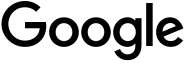
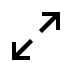
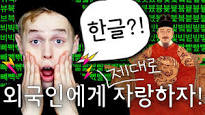
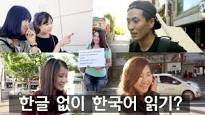
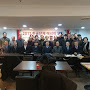
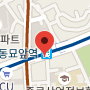
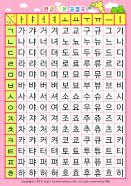
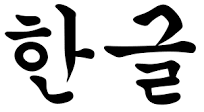
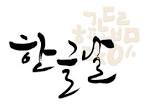
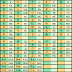
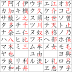
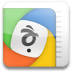

In [22]:
html = requests.get(url, params=params, headers=headers)
html.text

[<a href="/search?q=%ED%95%9C%EA%B8%80&amp;gbv=1&amp;sei=kk5NW-CjOtLbhwOJzImwDQ">여기</a>,
 <a aria-expanded="false" class="gb_b gb_dc" data-ogsr-alt="" href="https://www.google.co.kr/intl/ko/options/" role="button" tabindex="0" title="Google 앱"></a>,
 <a class="gb_5f gb_Aa gb_Eb" href="https://accounts.google.com/ServiceLogin?hl=ko&amp;passive=true&amp;continue=https://www.google.com/search%3Fq%3D%25ED%2595%259C%25EA%25B8%2580" id="gb_70" target="_top">로그인</a>,
 <a data-hveid="3" href="https://www.google.com/webhp?hl=ko&amp;sa=X&amp;ved=0ahUKEwjgtMfhhaXcAhXS7WEKHQlmAtYQPAgD" id="logo" title="Google 홈페이지로 이동"><img alt="Google" height="44" src="/images/branding/googlelogo/2x/googlelogo_color_120x44dp.png" width="120"/></a>,
 <a href="//support.google.com/websearch/answer/186645?hl=ko">자세히 알아보기</a>,
 <a class="duf3 aciXEb" data-async-trigger="duf3-46" data-ved="0ahUKEwjgtMfhhaXcAhXS7WEKHQlmAtYQtw8IBQ" href="#" id="sbfblt" jsaction="async.u">부적절한 예상 검색어 신고</a>,
 <a class="q qs" href="/searc
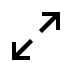

In [23]:
dom = BeautifulSoup(html.text, 'lxml')
dom.select('a')

In [25]:
a_list = dom.select("div.rc > h3.r > a") # CSS SELECTOR
for a in a_list:
    print(a['href'])

http://www.hancom.com/downLoad.downPU.do
https://www.hancom.com/product/productWindowsMain.do
https://namu.wiki/w/%ED%95%9C%EA%B8%80
https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B8%80
https://ko.wikibooks.org/wiki/%ED%95%9C%EA%B5%AD%EC%96%B4_%EC%9E%85%EB%AC%B8/%ED%95%9C%EA%B8%80_%EC%9E%90%EB%AA%A8
https://www.korean.go.kr/hangeul/principle/001.html
https://www1.president.go.kr/petitions/154276
http://www.kocca.kr/cop/bbs/view/B0000137/1833364.do?menuNo=200827&noticevent=Y
https://www.microsoft.com/ko-kr/download/details.aspx?id=36772


In [26]:
def get_url(url, params=None, num_retries=2):
    html = requests.get(url, params=params, headers=headers)
    
    if 500 <= html.status_code < 600 and num_retries > 0:
        print(html.status_code, html, html.reason)
        return get_url(url, params, num_retries-1)
    dom = BeautifulSoup(html.text, 'lxml')
    links = dom.select('div.rc > h3.r > a')
    
    return [link['href'] for link in links if link.has_attr['href']]

In [27]:
link_list = get_url(url, params)
link_list

['http://www.hancom.com/downLoad.downPU.do',
 'https://www.hancom.com/product/productWindowsMain.do',
 'https://namu.wiki/w/%ED%95%9C%EA%B8%80',
 'https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B8%80',
 'https://ko.wikibooks.org/wiki/%ED%95%9C%EA%B5%AD%EC%96%B4_%EC%9E%85%EB%AC%B8/%ED%95%9C%EA%B8%80_%EC%9E%90%EB%AA%A8',
 'https://www.korean.go.kr/hangeul/principle/001.html',
 'https://www1.president.go.kr/petitions/154276',
 'http://www.kocca.kr/cop/bbs/view/B0000137/1833364.do?menuNo=200827&noticevent=Y',
 'https://www.microsoft.com/ko-kr/download/details.aspx?id=36772']

In [30]:
seed = "https://google.com/search"
select = 'div.rc > h3.r > a'
queue = [seed]

while queue:
    url = queue.pop()
    queue.extend(get_url(url, params, select))
    print(url, len(queue))
    select = 'a'

https://google.com/search 9
https://www.microsoft.com/ko-kr/download/details.aspx?id=36772 8
http://www.kocca.kr/cop/bbs/view/B0000137/1833364.do?menuNo=200827&noticevent=Y 7
https://www1.president.go.kr/petitions/154276 6
https://www.korean.go.kr/hangeul/principle/001.html 5
https://ko.wikibooks.org/wiki/%ED%95%9C%EA%B5%AD%EC%96%B4_%EC%9E%85%EB%AC%B8/%ED%95%9C%EA%B8%80_%EC%9E%90%EB%AA%A8 4
https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B8%80 3
https://namu.wiki/w/%ED%95%9C%EA%B8%80 2
https://www.hancom.com/product/productWindowsMain.do 1
http://www.hancom.com/downLoad.downPU.do 0


## 뽐뿌 자유게시판 스크래핑하기
뽐뿌는 html 표준을 안지킨 좋은 사례이다. 또한 utf-8로 인코딩되어있지 않으며, euc-kr이라는 옛날 인코딩을 사용하고 있다.

In [1]:
import requests
from bs4 import BeautifulSoup
import re

seed = "http://www.ppomppu.co.kr/zboard/zboard.php"
params = {
    "id":"ppomppu",
}

ppomppus = dict()

def get_ppomppu_url(url, params=None, num_retries=2):
    headers = {
    "User-agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36",
    "Accept-Encoding": "none"
    }
    
    html = requests.get(url, params=params, headers=headers)
    
    if 500 <= html.status_code < 600 and num_retries > 0:
        print(html.status_code, html, html.reason)
        return get_url(url, params, num_retries-1)

    soup = BeautifulSoup(html.text, 'lxml')
    links = soup.select('td[valign=middle] > a')
    return links

In [2]:
for link in get_ppomppu_url(seed, params):
    print('뽐뿌: {}'.format(link.get_text()))
    print('URL: http://www.ppomppu.co.kr/zboard/', link['href'], sep='', end='\n\n')
    ppomppus[link.get_text()] = 'http://www.ppomppu.co.kr/zboard/'+link['href']

뽐뿌: [11번가] 해피바스 쥬스스무디애프리콧 바디워시 300g 체험딜 (3,000/무료)
URL: http://www.ppomppu.co.kr/zboard/view.php?id=ppomppu&page=1&divpage=51&no=290608

뽐뿌: [위메프] 오뚜기참치 150g 10개+사은품 (13,900 / 무료)
URL: http://www.ppomppu.co.kr/zboard/view.php?id=ppomppu&page=1&divpage=51&no=290607

뽐뿌: [G마켓] 배틀그라운드 2018 PGI 타이틀세트(100원/MMS전송)
URL: http://www.ppomppu.co.kr/zboard/view.php?id=ppomppu&page=1&divpage=51&no=290606

뽐뿌: [홈데이몰] ][샤오미] 드라이버 세트_JXLSD01XH (16,900/2500)
URL: http://www.ppomppu.co.kr/zboard/view.php?id=ppomppu&page=1&divpage=51&no=290605

뽐뿌: [G마켓] 북앤라이프 모바일 도서문화상품권 10만원 스마일페이 (91,000원/무료)
URL: http://www.ppomppu.co.kr/zboard/view.php?id=ppomppu&page=1&divpage=51&no=290604

뽐뿌: [G마켓] 디지털 체중계 (6,900/3,000)
URL: http://www.ppomppu.co.kr/zboard/view.php?id=ppomppu&page=1&divpage=51&no=290603

뽐뿌: [신한올댓] 신세계상품권 10만원권 (100,000원/무료), 익월말에 3천 포인트 적립
URL: http://www.ppomppu.co.kr/zboard/view.php?id=ppomppu&page=1&divpage=51&no=290602

뽐뿌: [스팀] 히트맨 7월31일까지 무료 플레이 [무료/무료]
URL: http://www.ppomppu.co.kr/zboard

In [3]:
ppomppus

{'LGOLED65C8PUA/18년올레드신상C8P/65인치/모든비용포함(2,774,000원/무료) - 카드혜택 11만원+3%OK캐쉬백 적립': 'http://www.ppomppu.co.kr/zboard/view.php?id=ppomppu&page=1&divpage=51&no=290590',
 '[11번가] PHILIPS 필립스 음파칫솔 소닉케어 HX6711/02 (45600/무료) 카드 추가 5% 할인가능': 'http://www.ppomppu.co.kr/zboard/view.php?id=ppomppu&page=1&divpage=51&no=290594',
 '[11번가] 라이젠2400G 조립pc (367,000/5,000)': 'http://www.ppomppu.co.kr/zboard/view.php?id=ppomppu&page=1&divpage=51&no=290592',
 '[11번가] 해피바스 쥬스스무디애프리콧 바디워시 300g 체험딜 (3,000/무료)': 'http://www.ppomppu.co.kr/zboard/view.php?id=ppomppu&page=1&divpage=51&no=290608',
 '[G9] 동남아음식 쿠킹박스11종 균일행사 (11,900/무료)': 'http://www.ppomppu.co.kr/zboard/view.php?id=ppomppu&page=1&divpage=51&no=290600',
 '[G9] 라이젠5 레이븐릿지 2400G 136,100/배송비 무료 (스마트클럽 적용+이벤트 캐쉬 적용시 125,100)': 'http://www.ppomppu.co.kr/zboard/view.php?id=ppomppu&page=1&divpage=51&no=290598',
 '[G9] 베트남 G7 블랙커피 200개입 (11,480/무료) 쿠폰+이벤트캐쉬적용시 최종가 (9,480원)': 'http://www.ppomppu.co.kr/zboard/view.php?id=ppomppu&page=1&divpage=51&no=290595',
 '[G

In [4]:
#seed = "http://www.ppomppu.co.kr/zboard/view.php"
#params = {
#    "id":"ppomppu",
#    "page":"1",
#    "divpage":'51',
#    "no":'290392'
#}

def get_ppomppu_content(url, params=None, num_retries=2):
    headers = {
    "User-agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36",
    "Accept-Encoding": "none"
    }
    
    html = requests.get(url, params=params, headers=headers)
    
    if 500 <= html.status_code < 600 and num_retries > 0:
        print(html.status_code, html, html.reason)
        return get_url(url, params, num_retries-1)
    
    soup = BeautifulSoup(html.text, 'lxml')
    contents = soup.select('td.board-contents')
    contents = " ".join(contents[0].get_text().replace(u'\xa0', u' ').replace(u'\n', u' ').split())
    link = soup.select('div.wordfix > a')
    
    # return unicodedata.normalize("NFKD", links[0].get_text()) 글자 다 깨짐
    print('쇼핑몰 URL: {}\n'.format(link[0].get_text()))
    print('본문 내용: {}\n\n'.format(contents))

In [5]:
get_ppomppu_content('http://www.ppomppu.co.kr/zboard/view.php?id=ppomppu&page=1&divpage=51&no=290419')

쇼핑몰 URL: http://item.gmarket.co.kr/Item?goodscode=1462322787

본문 내용: 얼마전 옥션꺼는 판매중지 상태네요 후기 보면 큐브가 재질이 좋다네요 훼르자 사실거면 위메프 가세요 2900원 무배네요 http://m.wemakeprice.com/m/deal/adeal/3843434/?utm_source=naver_ep&utm_medium=PRICE_af&utm_campaign=0&NaPm=ct%3Djjpf5d0o%7Cci%3D6a5b41f2d90f1da83dece70a8694307306809341%7Ctr%3Dslsl%7Csn%3D197023%7Chk%3Dc0dd630db36cf2e92a8aa98f4a7fea3b05c9488a




In [6]:
get_ppomppu_content('http://www.ppomppu.co.kr/zboard/view.php?id=ppomppu&page=1&divpage=51&no=290412')

쇼핑몰 URL: http://www.ellotte.com/goods/viewGoodsDetail.lotte?goods_no=420651008#/

본문 내용: 닥마 신발 싸게 나왔네요~ 네이버 중복 쿠폰도 가능하네요! 필요하신분들 한족씩 득해가시면 될것같아용~~




In [7]:
ppomppus.values()

dict_values(['http://www.ppomppu.co.kr/zboard/view.php?id=ppomppu&page=1&divpage=51&no=290608', 'http://www.ppomppu.co.kr/zboard/view.php?id=ppomppu&page=1&divpage=51&no=290607', 'http://www.ppomppu.co.kr/zboard/view.php?id=ppomppu&page=1&divpage=51&no=290606', 'http://www.ppomppu.co.kr/zboard/view.php?id=ppomppu&page=1&divpage=51&no=290605', 'http://www.ppomppu.co.kr/zboard/view.php?id=ppomppu&page=1&divpage=51&no=290604', 'http://www.ppomppu.co.kr/zboard/view.php?id=ppomppu&page=1&divpage=51&no=290603', 'http://www.ppomppu.co.kr/zboard/view.php?id=ppomppu&page=1&divpage=51&no=290602', 'http://www.ppomppu.co.kr/zboard/view.php?id=ppomppu&page=1&divpage=51&no=290601', 'http://www.ppomppu.co.kr/zboard/view.php?id=ppomppu&page=1&divpage=51&no=290600', 'http://www.ppomppu.co.kr/zboard/view.php?id=ppomppu&page=1&divpage=51&no=290599', 'http://www.ppomppu.co.kr/zboard/view.php?id=ppomppu&page=1&divpage=51&no=290598', 'http://www.ppomppu.co.kr/zboard/view.php?id=ppomppu&page=1&divpage=51&no=

In [8]:
for url in ppomppus.values():
    get_ppomppu_content(url)

쇼핑몰 URL: http://www.11st.co.kr/html/nc/SellerProduct2061262498.html

본문 내용: 바디워시 체험딜이네요 300g 작습니다 여행용으로 추천드려요~!


쇼핑몰 URL: http://m.wemakeprice.com/m/deal/adeal/3841069/

본문 내용: 오뚜기 참치 기본 10캔에 마요네즈나 다시마스낵 사은품 주세요 1천원 할인쿠폰 받아야 13,900원 에 살수 있습니다~


쇼핑몰 URL: http://item.gmarket.co.kr/Item?goodscode=1463501780

본문 내용: 3차 재판매 입니다. 배틀그라운드 게임용 아이템 입니다.


쇼핑몰 URL: http://www.homedaymall.com/goods/goodsDetail.do?goodsNo=G1802281514_7217&cafe_mkt=ntbox_a02&utm_source=naver&utm_medium=shopping_ads&utm_campaign=naver_thumbnail_trends_ads&NaPm=ct%3Djjs6yhn4%7Cci%3D8

본문 내용: 평상시 보고 있던 샤오미 드라이버가 특가로 나왔더라구요. 뽐뿌에 많이 올라왔었는데 그 전 가격에 비하면 특가가 맞는것 같긴해요~~ 최근 11번가에 올라왔을때 가격도 비슷하긴 했지만 그건 온갖 쿠폰과 포인트를 총 동원해야했던 가격이라서~ 이건 그냥 기본 할인이 이정도입니다.


쇼핑몰 URL: http://item.gmarket.co.kr/Item?goodscode=1126471183

본문 내용: 위메프 등 92,000원이고 지마켓 슈퍼딜 91,000원입니다 스마일페이로 구매 가능한 딜입니다 5만원권은 45,750원입니다 (북앤라이프 같은 판매자)


쇼핑몰 URL: http://item.gmarket.co.kr/Item?goodscode=875244290

본문 내용: 이제는 1만원 정도면 체중계를 살수가 있네요 더늦기전에... 우리가 휴가를 떠나기전에... 목

### 180707 실습

xpath: http://www.nextree.co.kr/p6278/

In [223]:
import requests
from bs4 import BeautifulSoup

data = requests.get('http://www.daum.net')
data.text

'<!DOCTYPE html>\n<html lang="ko" class="">\n<head>\n<meta charset="utf-8"/>\n<title>Daum</title>\n<meta property="og:url" content="https://www.daum.net/">\n<meta property="og:type" content="website">\n<meta property="og:title" content="Daum">\n<meta property="og:image" content="//i1.daumcdn.net/svc/image/U03/common_icon/5587C4E4012FCD0001">\n<meta property="og:description" content="나의 관심 콘텐츠를 가장 즐겁게 볼 수 있는 Daum">\n<meta name="msapplication-task" content="name=Daum;action-uri=https://www.daum.net/;icon-uri=/favicon.ico">\n<meta name="msapplication-task" content="name=미디어다음;action-uri=http://media.daum.net/;icon-uri=/media_favicon.ico">\n<meta name="msapplication-task" content="name=메일;action-uri=http://mail.daum.net;icon-uri=/mail_favicon.ico">\n<meta name="referrer" content="origin">\n<link rel="search" type="application/opensearchdescription+xml" href="//search.daum.net/OpenSearch.xml" title="다음">\n<style type="text/css">\n@charset "utf-8";\nbody,div,dl,dt,dd,ul,ol,li,h1,h2,h3,h4,h5,

In [35]:
%%writefile basso.txt
바소
사랑해요!

Overwriting basso.txt


In [50]:
f = open('basso.txt', 'r', encoding='utf-8')

In [46]:
type(f) #_io라는 것은 외부객체. iterator이므로, for문 안에 쓸 수 있다.

_io.TextIOWrapper

In [52]:
dir(f)

['_CHUNK_SIZE',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_checkClosed',
 '_checkReadable',
 '_checkSeekable',
 '_checkWritable',
 '_finalizing',
 'buffer',
 'close',
 'closed',
 'detach',
 'encoding',
 'errors',
 'fileno',
 'flush',
 'isatty',
 'line_buffering',
 'mode',
 'name',
 'newlines',
 'read',
 'readable',
 'readline',
 'readlines',
 'seek',
 'seekable',
 'tell',
 'truncate',
 'writable',
 'write',
 'writelines']

일을 열면 위와 같이 항상 close해 주는 것이 좋다. 하지만 이렇게 파일을 열고 닫는 것을 자동으로 처리할 수 있다면 편리하지 않을까?

파이썬의 with문이 바로 이런 역할을 해준다. 다음의 예는 with문을 이용해서 위 예제를 다시 작성한 모습이다.

위와 같이 with문을 이용하면 with 블록을 벗어나는 순간 열린 파일 객체 f가 자동으로 close되어 편리하다. 

In [51]:
# with쓰면 굳이 close쓸 필요가 없다. try-finally도 똑같다.
with open('basso.txt', encoding='utf-8') as f:
    print(f.read())

바소
사랑해요!


In [ ]:
url 넣는거 함수형태로 바꿔서 넣을 수 있게.
인자를 갖고와 db를 sqlite로 넘기기.

In [70]:
import requests
import chardet

data = requests.get('http://www.ppomppu.co.kr', headers={"Accept-Encoding": "none"})
# 뽐뿌 인코딩
data.encoding

'euc-kr'

In [71]:
import chardet
# content가 byte이기 때문에 이걸 넣어줘야 한다. data.text는 str.
chardet.detect(data.content)

{'confidence': 0.99, 'encoding': 'CP949', 'language': 'Korean'}

#### 90년대 홈페이지 aistudy 살펴보기

In [72]:
data2 = requests.get('http://www.aistudy.com/')
data2.encoding

'ISO-8859-1'

In [73]:
chardet.detect(data2.content)

{'confidence': 0.99, 'encoding': 'EUC-KR', 'language': 'Korean'}

In [74]:
data2.text # 다 깨진상태.

'<html>\r\n<head>\r\n<meta http-equiv="content-type" content="text/html; charset=euc-kr">\r\n<meta name="viewport" content="width=device-width,initial-scale=1">\r\n<title>AI Study</title>\r\n<meta name="generator" content="Namo WebEditor">\r\n<style><!--\r\n.leading200 { line-height:200%; }\r\n.leading180 { line-height:180%; }\r\n.leading150 { line-height:150%; }\r\n.leading100 { line-height:100%; }\r\na:link { text-decoration:none; }\r\na:hover { color:red; }\r\na:visited { text-decoration:none; }\r\na:active { text-decoration:none; }\r\n-->\r\n</style>\r\n\r\n<meta name="namo_guide" content="h456">\r\n</head>\r\n\r\n<body bgcolor="#FFFFDF" text="black" link="blue" vlink="purple" alink="red">\r\n<p style="line-height:150%;"><font\r\n             face="Times New Roman"><b><span style="font-size:12pt;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&

In [76]:
en2 = data2.content.decode('euc-kr')
en2

'<html>\r\n<head>\r\n<meta http-equiv="content-type" content="text/html; charset=euc-kr">\r\n<meta name="viewport" content="width=device-width,initial-scale=1">\r\n<title>AI Study</title>\r\n<meta name="generator" content="Namo WebEditor">\r\n<style><!--\r\n.leading200 { line-height:200%; }\r\n.leading180 { line-height:180%; }\r\n.leading150 { line-height:150%; }\r\n.leading100 { line-height:100%; }\r\na:link { text-decoration:none; }\r\na:hover { color:red; }\r\na:visited { text-decoration:none; }\r\na:active { text-decoration:none; }\r\n-->\r\n</style>\r\n\r\n<meta name="namo_guide" content="h456">\r\n</head>\r\n\r\n<body bgcolor="#FFFFDF" text="black" link="blue" vlink="purple" alink="red">\r\n<p style="line-height:150%;"><font\r\n             face="Times New Roman"><b><span style="font-size:12pt;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&

Base64 인코딩은 64개의 문자를 이용하여 바이너리 데이터를 아스키 텍스트 데이터로 표현하기 위해 사용됩니다.

base64는 8bit의 데이터(바이너리)를 6bit의 크기로 표현합니다. 따라서 24bit를 단위로 하여 3개의 문자에서 4개의 문자를 얻게 되는 것입니다.

# 네이버 스팸메일 자동으로 삭제하는 봇 만들기
## Selenium
Selenium은 주로 웹앱을 테스트하는데 이용하는 프레임워크다. webdriver라는 API를 통해 운영체제에 설치된 Chrome등의 브라우저를 제어하게 된다.

브라우저를 직접 동작시킨다는 것은 JavaScript를 이용해 비동기적으로 혹은 뒤늦게 불러와지는 컨텐츠들을 가져올 수 있다는 것이다. 즉, ‘눈에 보이는’ 컨텐츠라면 모두 가져올 수 있다는 뜻이다.

우리가 requests에서 사용했던 .text의 경우 브라우저에서 ‘소스보기’를 한 것과 같이 동작하여, JS등을 통해 동적으로 DOM이 변화한 이후의 HTML을 보여주지 않는다. 반면 Selenium은 실제 웹 브라우저가 동작하기 때문에 JS로 렌더링이 완료된 후의 DOM결과물에 접근이 가능하다.

Selenium은 webdriver라는 것을 통해 디바이스에 설치된 브라우저들을 제어할 수 있다. 이번 가이드에서는 Chrome을 사용해 볼 예정이다.

### PhantomJS webdriver
PhantomJS는 기본적으로 WebTesting을 위해 나온 Headless Browser다.(즉, 화면이 존재하지 않는다) 하지만 JS등의 처리를 온전하게 해주며 CLI환경에서도 사용이 가능하기 때문에, 만약 CLI서버 환경에서 돌아가는 크롤러라면 PhantomJS를 사용하는 것도 방법이다.

PhantomJS는 PhantomJS Download Page에서 받을 수 있다. Binary 자체로 제공되기 때문에, Linux를 제외한 OS에서는 외부 dependency없이 바로 실행할 수 있다.

Selenium은 webdriver api를 통해 브라우저를 제어한다.
우선 webdriver를 import해주자.

In [2]:
from selenium import webdriver

# Chrome의 경우
driver = webdriver.Chrome('/Users/korra/Documents/chromedriver')
# Phantom JS의 경우
# driver = webdriver.PhantomJS('/Users/korra/Documents/phantomjs-2.1.1-windows/bin/phantomjs')

# 암묵적으로 웹 자원이 로드될때까지 시간을 implicity_wait을 통해 설정.
driver.implicitly_wait(3)

# url에 접근. 크롬이 뜰 것이다.
driver.get('https://www.google.com')

Selenium은 driver객체를 통해 여러가지 메소드를 제공한다.

URL에 접근하는 api,
- `get(‘http://url.com’)`

페이지의 단일 element에 접근하는 api,
- `find_element_by_name(‘HTML_name’)`
- `find_element_by_id(‘HTML_id’)`
- `find_element_by_xpath(‘/html/body/some/xpath’)`

페이지의 여러 elements에 접근하는 api 등이 있다.
- `find_element_by_css_selector(‘#css > div.selector’)`
- `find_element_by_class_name(‘some_class_name’)`
- `find_element_by_tag_name(‘h1’)`

위 메소드들을 활용시 HTML을 브라우저에서 파싱해주기 때문에 굳이 Python와 BeautifulSoup을 사용하지 않아도 된다.
하지만 Selenium에 내장된 함수만 사용가능하기 때문에 좀더 사용이 편리한 soup객체를 이용하려면 driver.page_source API를 이용해 현재 렌더링 된 페이지의 Elements를 모두 가져올 수 있다.

네이버는 requests를 이용해 로그인하는 것이 어렵다. 프론트 단에서 JS처리를 통해 로그인 처리를 하기 때문인데, Selenium을 이용하면 아주 쉽게 로그인을 할 수 있다.

In [68]:
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.alert import Alert
from bs4 import BeautifulSoup
from pprint import pprint
import re

def delete_spam():
    # 네이버 메일 들어가기
    driver.get('https://mail.naver.com/')
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')

    # 메일 번호를 갖고오기 위한 RE. findall로 해도 되지만, search 및 group 메소드 사용연습을 하기 위해 사용.
    mailcode = re.compile(r'mailsn="([0-9]+)"')

    # 메일 발신자, 제목, 번호 갖고오기
    mail_sender = soup.select('div.name')
    mail_title = soup.select('strong.mail_title')

    mail_senders = [re.findall(':\s*(.+)',mail_sender[x].get_text())[0] for x in range(len(mail_sender))]
    mail_titles = [re.findall(':\s*(.+)',mail_title[x].get_text())[0] for x in range(len(mail_title))]
    mail_codes = [mailcode.search(str(mail_title[x])).group(1) for x in range(len(mail_title))]

    mails = list(zip(mail_senders, mail_titles, mail_codes))
    
    print("============ 메일함 메일 목록 ============")
    pprint(mails)

    spam_codes = list()
    for mail in mails:
        # 스팸처리할 단어들
        spam_words = ['광고', '로그인 차단 기능', '새로운 기기', '선교', '성도', '성경', '목회']
        # 스팸 처리할 단어가 포함된 메일의 번호들
        if [mail[2] for x in range(len(spam_words)) if spam_words[x] in mail[1]]:
            spam_codes.append(mail[2])
    
    for spam_code in spam_codes:
        # 해당 메일 선택 -> 삭제버튼 클릭
        driver.find_element_by_xpath('//*[@id="mailCheck_'+spam_code+'"]').click()
    driver.find_element_by_xpath('//*[@id="listBtnMenu"]/div[1]/span[2]/button[2]').click()


def permenant_delete():
    # 휴지통 클릭, 모든 메일 영구삭제
    driver.find_element_by_xpath('//*[@id="4_fol"]').click()
    driver.find_element_by_xpath('//*[@id="mailCheckAll"]').click()
    driver.find_element_by_xpath('//*[@id="listBtnMenu"]/div[1]/span[2]/button[1]').click()
    # '메일을 삭제하시겠습니까?' 알림창 처리
    Alert(driver).accept()

In [67]:
driver = webdriver.Chrome('/Users/korra/Documents/chromedriver')
driver.implicitly_wait(3)

driver.get('https://nid.naver.com/nidlogin.login')

# ID/PW입력
driver.find_element_by_name('id').send_keys('아이디')
driver.find_element_by_name('pw').send_keys('비밀번호')

# 로그인 버튼 누르기
driver.find_element_by_xpath('//*[@id="frmNIDLogin"]/fieldset/input').click()

# 2중 로그인 기준으로 되어 있습니다.
# 핸드폰번호 입력
try:
    driver.find_element_by_id('phone_value').send_keys('전화번호')
    driver.find_element_by_xpath('//*[@id="frmNIDLogin"]/fieldset/span/input').click()

    # 자주 사용 기기 등록 버튼
    driver.find_element_by_xpath('//*[@id="frmNIDLogin"]/fieldset/span[1]/a').click()
    # 로그인 상태 유지 안함
    driver.find_element_by_xpath('//*[@id="login_maintain"]/span[2]/a').click()

#보안설정 넘어가기
except Exception as e:
    print(e)

delete_spam()

permenant_delete()

============ 메일함 메일 목록 ============
[('네이버', '새로운 기기(브라우저)에서 로그인 되었습니다.', '11153'),
 ('네이버', '로그인 차단 기능이 실행되었습니다.', '11152'),
 ('네이버', '새로운 기기(브라우저)에서 로그인 되었습니다.', '11151'),
 ('네이버', '로그인 차단 기능이 실행되었습니다.', '11150'),
 ('네이버', '새로운 기기(브라우저)에서 로그인 되었습니다.', '11149'),
 ('네이버', '새로운 기기(브라우저)에서 로그인 되었습니다.', '11147'),
 ('네이버', '새로운 기기(브라우저)에서 로그인 되었습니다.', '11145'),
 ('네이버', '새로운 기기(브라우저)에서 로그인 되었습니다.', '11140'),
 ('네이버', '새로운 기기(브라우저)에서 로그인 되었습니다.', '11138'),
 ('네이버', '새로운 기기(브라우저)에서 로그인 되었습니다.', '11136'),
 ('네이버', '새로운 기기(브라우저)에서 로그인 되었습니다.', '11134'),
 ('네이버', '로그인 차단 기능이 실행되었습니다.', '11133'),
 ('네이버', '로그인 차단 기능이 실행되었습니다.', '11132'),
 ('네이버', '새로운 기기(브라우저)에서 로그인 되었습니다.', '11131'),
 ('네이버', '로그인 차단 기능이 실행되었습니다.', '11130')]


In [69]:
delete_spam()

============ 메일함 메일 목록 ============
[('네이버', '새로운 기기(브라우저)에서 로그인 되었습니다.', '11153'),
 ('네이버', '새로운 기기(브라우저)에서 로그인 되었습니다.', '11151'),
 ('네이버', '새로운 기기(브라우저)에서 로그인 되었습니다.', '11149'),
 ('네이버', '새로운 기기(브라우저)에서 로그인 되었습니다.', '11147'),
 ('네이버', '새로운 기기(브라우저)에서 로그인 되었습니다.', '11145'),
 ('네이버', '새로운 기기(브라우저)에서 로그인 되었습니다.', '11140'),
 ('네이버', '새로운 기기(브라우저)에서 로그인 되었습니다.', '11138'),
 ('네이버', '새로운 기기(브라우저)에서 로그인 되었습니다.', '11136'),
 ('네이버', '새로운 기기(브라우저)에서 로그인 되었습니다.', '11134'),
 ('네이버', '새로운 기기(브라우저)에서 로그인 되었습니다.', '11131'),
 ('네이버', '로그인 차단 기능이 실행되었습니다.', '11129'),
 ('네이버', '로그인 차단 기능이 실행되었습니다.', '11128'),
 ('네이버', '로그인 차단 기능이 실행되었습니다.', '11127'),
 ('네이버', '새로운 기기(브라우저)에서 로그인 되었습니다.', '11126'),
 ('Namepr', '(광고) 삼성노트북9 54%할인 599,000원', '11124')]
